In [1]:
import numpy as np
import pandas as pd

from parflow.tools.io import read_pfb
from parflow.tools.fs import get_absolute_path
from parflow import Run
from parflow.tools.hydrology import calculate_surface_storage, calculate_subsurface_storage, calculate_water_table_depth, calculate_evapotranspiration, calculate_overland_flow_grid, calculate_overland_fluxes

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os

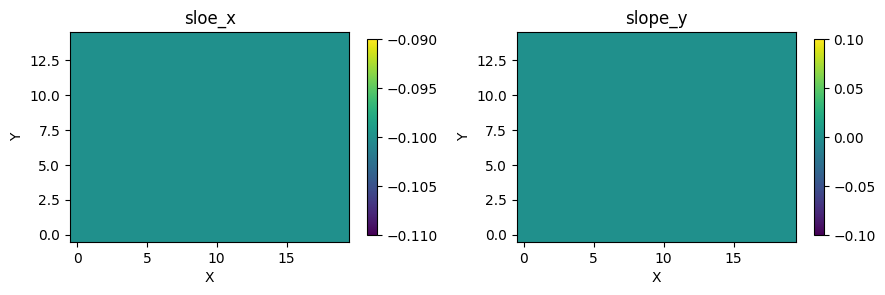

In [2]:
slopex = read_pfb(get_absolute_path("/home/whm36/WHM/exercises/output/domain_example.out.slope_x.pfb"))
# slope.shape = (1, 15, 20)
slopey = read_pfb(get_absolute_path("/home/whm36/WHM/exercises/output/domain_example.out.slope_y.pfb"))
# slopey.shape = (1, 15, 20)

fig, ax = plt.subplots(1, 2, figsize=(9, 3))

im0 = ax[0].imshow(slopex.squeeze(), cmap='viridis', origin='lower')
fig.colorbar(im0, ax=ax[0], shrink=0.8)
ax[0].set_title('sloe_x')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

im1 = ax[1].imshow(slopey.squeeze(), cmap='viridis', origin='lower')
fig.colorbar(im1, ax=ax[1], shrink=0.8)
ax[1].set_title('slope_y')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

plt.tight_layout()

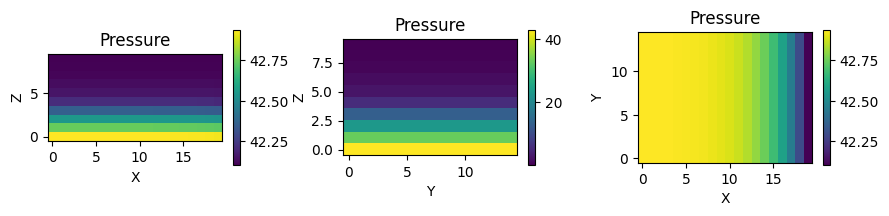

In [3]:
press = read_pfb(get_absolute_path("/home/whm36/WHM/exercises/output/domain_example.out.press.00005.pfb"))
# press.shape = (z, y, x)

fig, ax = plt.subplots(1, 3, figsize=(9, 3))
im0 = ax[0].imshow(press[0, :, :], cmap='viridis', origin='lower')
fig.colorbar(im0, ax=ax[0], shrink=0.5)
ax[0].imshow(press[:, 9, :], cmap='viridis', origin='lower')
ax[0].set_title('Pressure')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Z')

im1 = ax[1].imshow(press[:, :, 0], cmap='viridis', origin='lower')
fig.colorbar(im1, ax=ax[1], shrink=0.5)
ax[1].set_title('Pressure')
ax[1].set_xlabel('Y')
ax[1].set_ylabel('Z')

im2 = ax[2].imshow(press[0, :, :], cmap='viridis', origin='lower')
fig.colorbar(im2, ax=ax[2], shrink=0.5)
ax[2].set_title('Pressure')
ax[2].set_xlabel('X')
ax[2].set_ylabel('Y')

plt.tight_layout()


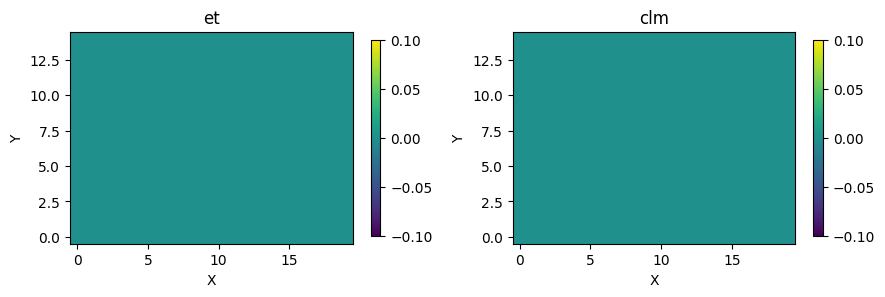

In [4]:
et = read_pfb(get_absolute_path("/home/whm36/WHM/exercises/output/domain_example.out.evaptrans.00005.pfb"))
clm = read_pfb(get_absolute_path("/home/whm36/WHM/exercises/output/domain_example.out.clm_output.00005.C.pfb"))

fig, ax = plt.subplots(1, 2, figsize=(9, 3))

im0 = ax[0].imshow(et[3, :, :], cmap='viridis', origin='lower')
fig.colorbar(im0, ax=ax[0], shrink=0.8)
ax[0].set_title('et')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

im1 = ax[1].imshow(clm[5, :, :], cmap='viridis', origin='lower')
fig.colorbar(im1, ax=ax[1], shrink=0.8)
ax[1].set_title('clm')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

plt.tight_layout()

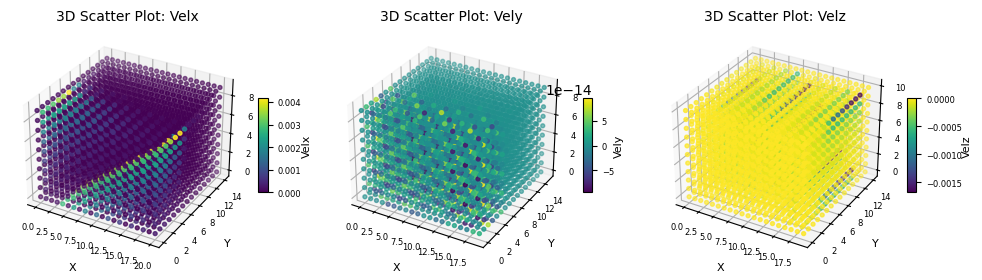

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Define a function to plot 3D scatter plots for a given dataset
def plot_3d_scatter(data, title, ax, cmap='viridis', color_label='Value'):
    z, y, x = np.arange(data.shape[0]), np.arange(data.shape[1]), np.arange(data.shape[2])
    X, Y, Z = np.meshgrid(x, y, z)  # Create grid of coordinates
    X, Y, Z = X.flatten(), Y.flatten(), Z.flatten()  # Flatten coordinates
    data_flat = data.flatten()  # Flatten the data array

    sc = ax.scatter(X, Y, Z, c=data_flat, s=8, cmap=cmap)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('X', fontsize=8, labelpad=0.1)
    ax.set_ylabel('Y', fontsize=8, labelpad=0.1)
    ax.tick_params(labelsize=6, pad=0.1)

    cbar = plt.colorbar(sc, ax=ax, shrink=0.2, aspect=10)
    cbar.set_label(color_label, fontsize=8, labelpad=0.1)
    cbar.ax.tick_params(labelsize=6)

# Paths to files
path_velx = get_absolute_path("/home/whm36/WHM/exercises/output/domain_example.out.velx.00005.pfb")
path_vely = get_absolute_path("/home/whm36/WHM/exercises/output/domain_example.out.vely.00005.pfb")
path_velz = get_absolute_path("/home/whm36/WHM/exercises/output/domain_example.out.velz.00005.pfb")

# Read the data
velx = read_pfb(path_velx)  # Shape: (10, 15, 21)
vely = read_pfb(path_vely)  # Shape: (10, 16, 20)
velz = read_pfb(path_velz)  # Shape: (11, 15, 20)

# Create a figure with two subplots for velx and vely
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(131, projection='3d')  # 3D subplot for velx
plot_3d_scatter(velx, "3D Scatter Plot: Velx", ax1, color_label='Velx')

ax2 = fig.add_subplot(132, projection='3d')  # 3D subplot for vely
plot_3d_scatter(vely, "3D Scatter Plot: Vely", ax2, color_label='Vely')

ax3 = fig.add_subplot(133, projection='3d')  # 3D subplot for velz
plot_3d_scatter(velz, "3D Scatter Plot: Velz", ax3, color_label='Velz')

plt.tight_layout()
plt.show()


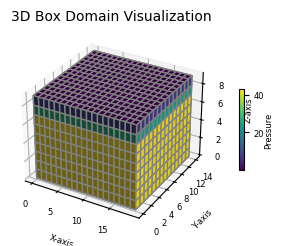

In [20]:
# Plot the pressure and saturation fields in 3D
dimensions = (10, 15, 20)    # (z, y, x)
data = press

# Extract surfaces
x = np.arange(dimensions[2])  # Number of columns in x direction (20)
y = np.arange(dimensions[1])  # Number of rows in y direction (15)
z = np.arange(dimensions[0])  # Number of layers in z direction (10)

bottom = data[0, :, :]       # Bottom surface (z=0)
top = data[-1, :, :]         # Top surface (z=max)

front = data[:, 0, :]        # Front face (y=0)
back = data[:, -1, :]        # Back face (y=max)

left = data[:, :, 0]         # Left face (x=0)
right = data[:, :, -1]       # Right face (x=max)


fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111, projection='3d')

# Plot top and bottom surfaces
# Grid for top and bottom surfaces
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, np.full_like(bottom, z[0]), facecolors=plt.cm.viridis(bottom), edgecolor='gray')
ax.plot_surface(X, Y, np.full_like(top, z[-1]), facecolors=plt.cm.viridis(top), edgecolor='gray')

# Plot front and back faces, y0, ymax
Z, X = np.meshgrid(z, x)
ax.plot_surface(X, np.full_like(front.T, y[0]), Z, facecolors=plt.cm.viridis(front.T), edgecolor='gray')
ax.plot_surface(X, np.full_like(back.T, y[-1]), Z, facecolors=plt.cm.viridis(back.T), edgecolor='gray')

# Plot left and right faces, x0, xmax
Z, Y = np.meshgrid(z, y)
ax.plot_surface(np.full_like(left.T, x[0]), Y, Z, facecolors=plt.cm.viridis(left.T), edgecolor='gray', rstride=1, cstride=1)
ax.plot_surface(np.full_like(right.T, x[-1]), Y, Z, facecolors=plt.cm.viridis(right.T), edgecolor='gray', rstride=1, cstride=1)

# Add labels and title
ax.set_xlabel('X-axis', labelpad=0.1, fontsize=6)
ax.set_ylabel('Y-axis', labelpad=0.1, fontsize=6)
ax.set_zlabel('Z-axis', labelpad=0.1, fontsize=6)
ax.tick_params(labelsize=6, pad=0.1)

norm = plt.Normalize(vmin=data.min(), vmax=data.max())
cmap = plt.cm.viridis
facecolors = cmap(norm(bottom))

mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(mappable, ax=ax, shrink=0.3, pad=0.1)
cbar.set_label('Pressure', fontsize=6, labelpad=0.1)
cbar.ax.tick_params(labelsize=6)

plt.tight_layout()

plt.title('3D Box Domain Visualization', fontsize=10)
plt.show()


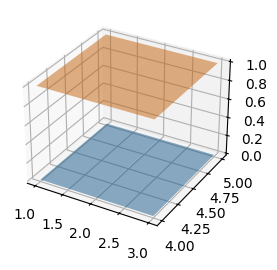

In [22]:
# Meshgrid example
x1 = np.array([1, 2, 3])
y1 = np.array([4, 5])
X1, Y1 = np.meshgrid(x1, y1)

# Create a 3D plot
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, Y1, np.zeros_like(X1), alpha=0.5)
ax.plot_surface(X1, Y1, np.ones_like(X1), alpha=0.5)
plt.show()


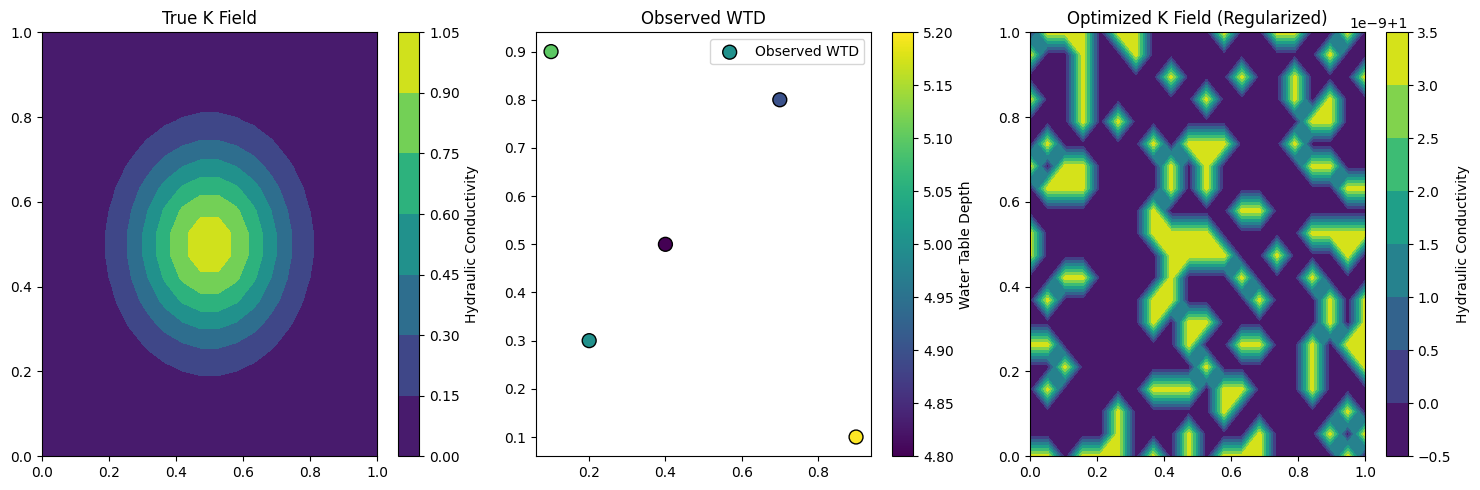

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.interpolate import griddata

# Observed data: Locations and water table depths
obs_locations = np.array([[0.2, 0.3], [0.4, 0.5], [0.7, 0.8], [0.1, 0.9], [0.9, 0.1]])
obs_wtd = np.array([5.0, 4.8, 4.9, 5.1, 5.2])

# Define domain
grid_size = 20
x = np.linspace(0, 1, grid_size)
y = np.linspace(0, 1, grid_size)
X, Y = np.meshgrid(x, y)

# True K field (ground truth for generating observed data)
true_k = np.exp(-((X - 0.5)**2 + (Y - 0.5)**2) / 0.05)

# Generate synthetic observations (simplified model)
def simulate_wtd(k_field):
    return np.mean(k_field) + np.random.normal(0, 0.05, len(obs_locations))

# Add noise to observed data
simulated_obs = simulate_wtd(griddata((X.flatten(), Y.flatten()), true_k.flatten(), obs_locations, method='linear'))

# Objective function with Tikhonov regularization
def objective_function(k_field, lambda_reg=0.1):
    k_field = k_field.reshape((grid_size, grid_size))
    simulated_wtd = simulate_wtd(k_field)
    misfit = np.sqrt(np.mean((simulated_wtd - obs_wtd) ** 2))
    regularization = lambda_reg * np.sum((np.gradient(k_field)[0]**2 + np.gradient(k_field)[1]**2))
    return misfit + regularization

# Initial guess for K field
initial_k = np.ones((grid_size, grid_size))

# Run optimization
result = minimize(lambda k: objective_function(k, lambda_reg=0.1), initial_k.flatten(), method='L-BFGS-B', bounds=[(0.01, 10)] * initial_k.size)

# Optimized K field
optimized_k = result.x.reshape((grid_size, grid_size))

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.contourf(X, Y, true_k, cmap='viridis')
plt.title('True K Field')
plt.colorbar(label='Hydraulic Conductivity')

plt.subplot(1, 3, 2)
plt.scatter(obs_locations[:, 0], obs_locations[:, 1], c=obs_wtd, cmap='viridis', s=100, edgecolor='black', label='Observed WTD')
plt.title('Observed WTD')
plt.colorbar(label='Water Table Depth')
plt.legend()

plt.subplot(1, 3, 3)
plt.contourf(X, Y, optimized_k, cmap='viridis')
plt.title('Optimized K Field (Regularized)')
plt.colorbar(label='Hydraulic Conductivity')

plt.tight_layout()
plt.show()
